In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler


df_train = pd.read_csv("../data/raw/application_train.csv")
df_test = pd.read_csv("../data/raw/application_test.csv")

In [2]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [3]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values = missing_values[missing_values["% of Total Values"] > 65]
to_drop = missing_values
to_drop = to_drop.transpose()
print("Number of columns to drop " + str(len(to_drop.columns)))

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
Number of columns to drop 17


In [6]:
df_train = df_train.drop(columns = to_drop)
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Missing values statistics
missing_values = missing_values_table(df_test)
missing_values = missing_values[missing_values["% of Total Values"] > 65]
to_drop = missing_values
to_drop = to_drop.transpose()
print("Number of columns to drop " + str(len(to_drop.columns)))

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.
Number of columns to drop 17


In [8]:
df_test = df_test.drop(columns = to_drop)
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
df_train_encoded = pd.get_dummies(df_train)
df_test_encoded = pd.get_dummies(df_test)

print("Training set shape :", df_train_encoded.shape)
print("Testing set shape :", df_test_encoded.shape)

Training set shape : (307511, 226)
Testing set shape : (48744, 222)


In [11]:
train_labels = df_train_encoded['TARGET']

df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join = 'inner', axis = 1)

# Add the target back in
df_train_encoded['TARGET'] = train_labels

print('Training Features shape: ', df_train_encoded.shape)
print('Testing Features shape: ', df_test_encoded.shape)

Training Features shape:  (307511, 223)
Testing Features shape:  (48744, 222)


In [12]:
df_train = df_train_encoded
df_test = df_test_encoded

In [13]:
anomaly = df_train['DAYS_EMPLOYED'] > 300000
df_train[anomaly].DAYS_EMPLOYED

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

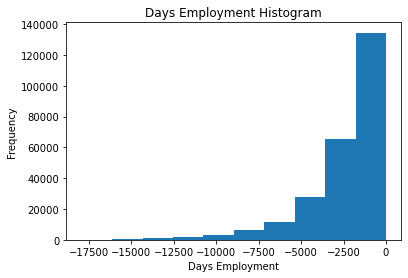

In [14]:
# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
df_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [15]:
# Find correlations with the target and sort
correlations = df_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [16]:
# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self):
        return None

# split data into X and y
X = df_train.drop(columns="TARGET")
Y = df_train['TARGET']
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
XGB_Accuracy = accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.90%


In [17]:
thresholds = sort(model.feature_importances_)
sorted_idx = np.argsort(model.feature_importances_)[::-1]

for index in sorted_idx:
    if model.feature_importances_[index] > 0.0075:
        print([df_train.columns[index], model.feature_importances_[index]])

['EXT_SOURCE_3', 0.024286801]
['NAME_EDUCATION_TYPE_Higher education', 0.023382097]
['EXT_SOURCE_2', 0.020632068]
['CODE_GENDER_M', 0.020509679]
['NAME_EDUCATION_TYPE_Secondary / secondary special', 0.0139792515]
['CODE_GENDER_F', 0.012773618]
['FLAG_OWN_CAR_N', 0.0127516175]
['FLAG_DOCUMENT_3', 0.01180927]
['REGION_RATING_CLIENT_W_CITY', 0.011125061]
['NAME_INCOME_TYPE_Working', 0.010878475]
['AMT_GOODS_PRICE', 0.010148173]
['NAME_INCOME_TYPE_Pensioner', 0.010079597]
['ORGANIZATION_TYPE_Police', 0.009941611]
['EXT_SOURCE_1', 0.009339397]
['NAME_CONTRACT_TYPE_Cash loans', 0.008701896]
['NAME_FAMILY_STATUS_Married', 0.008666724]
['NAME_EDUCATION_TYPE_Lower secondary', 0.008417456]
['AMT_CREDIT', 0.008347247]
['ORGANIZATION_TYPE_Industry: type 9', 0.007972569]
['NAME_INCOME_TYPE_State servant', 0.007816585]
['DEF_30_CNT_SOCIAL_CIRCLE', 0.007767614]
['ORGANIZATION_TYPE_Housing', 0.007707712]
['ORGANIZATION_TYPE_Self-employed', 0.0075523145]
['ORGANIZATION_TYPE_Transport: type 3', 0.007519

In [18]:
X = df_train.drop(columns="TARGET")
y = df_train['TARGET']

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[282262    424]
 [ 23192   1633]]


In [19]:
thresholds = sort(model.feature_importances_)
sorted_idx = np.argsort(model.feature_importances_)[::-1]

for index in sorted_idx:
    if model.feature_importances_[index] > 0.0075:
        print([df_train.columns[index], model.feature_importances_[index]])

['EXT_SOURCE_3', 0.024286801]
['NAME_EDUCATION_TYPE_Higher education', 0.023382097]
['EXT_SOURCE_2', 0.020632068]
['CODE_GENDER_M', 0.020509679]
['NAME_EDUCATION_TYPE_Secondary / secondary special', 0.0139792515]
['CODE_GENDER_F', 0.012773618]
['FLAG_OWN_CAR_N', 0.0127516175]
['FLAG_DOCUMENT_3', 0.01180927]
['REGION_RATING_CLIENT_W_CITY', 0.011125061]
['NAME_INCOME_TYPE_Working', 0.010878475]
['AMT_GOODS_PRICE', 0.010148173]
['NAME_INCOME_TYPE_Pensioner', 0.010079597]
['ORGANIZATION_TYPE_Police', 0.009941611]
['EXT_SOURCE_1', 0.009339397]
['NAME_CONTRACT_TYPE_Cash loans', 0.008701896]
['NAME_FAMILY_STATUS_Married', 0.008666724]
['NAME_EDUCATION_TYPE_Lower secondary', 0.008417456]
['AMT_CREDIT', 0.008347247]
['ORGANIZATION_TYPE_Industry: type 9', 0.007972569]
['NAME_INCOME_TYPE_State servant', 0.007816585]
['DEF_30_CNT_SOCIAL_CIRCLE', 0.007767614]
['ORGANIZATION_TYPE_Housing', 0.007707712]
['ORGANIZATION_TYPE_Self-employed', 0.0075523145]
['ORGANIZATION_TYPE_Transport: type 3', 0.007519

In [21]:
X = df_train.drop(columns="TARGET")
y = df_train['TARGET']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_imp, y_train)

X_test_imp = imp.transform(X_test)
y_pred_test = clf.predict(X_test_imp)

In [25]:
RFC_Accuracy = accuracy_score(y_test, y_pred_test)
accuracy_score(y_test, y_pred_test)

0.9203616083768271

In [26]:
RFC_CM = confusion_matrix(y_test, y_pred_test)
confusion_matrix(y_test, y_pred_test)

array([[56559,    89],
       [ 4809,    46]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.34      0.01      0.02      4855

    accuracy                           0.92     61503
   macro avg       0.63      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



In [29]:
df = df_train

<AxesSubplot:ylabel='Frequency'>

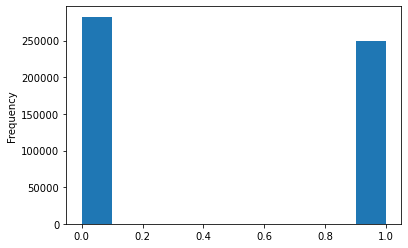

In [30]:
# Separate majority and minority classes
df_majority = df[df["TARGET"] == 0]
df_minority = df[df["TARGET"] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=250000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled

df_upsampled['TARGET'].plot.hist()


In [31]:
df_train_upsampled = df_upsampled

In [32]:
X = df_train_upsampled.drop(columns="TARGET")
y = df_train_upsampled['TARGET']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute impour data, then train
X_train_imp = imp.transform(X_train)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_imp, y_train)

X_test_imp = imp.transform(X_test)
y_pred_test = clf.predict(X_test_imp)

In [36]:
UP_RFC_Accuracy = accuracy_score(y_test, y_pred_test)
accuracy_score(y_test, y_pred_test)

0.994602864705551

In [37]:
UP_RFC_CM = confusion_matrix(y_test, y_pred_test)
confusion_matrix(y_test, y_pred_test)

array([[55987,   550],
       [   25, 49976]], dtype=int64)

In [38]:
df = df_train

In [39]:
X = df.drop(columns="TARGET")
y = df['TARGET']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train["TARGET"] = y_train
df = X_train

C:\Users\Yoann\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Frequency'>

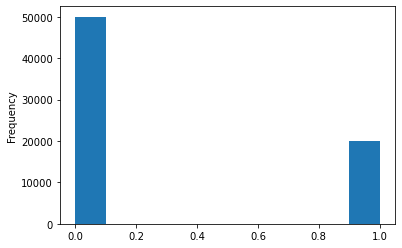

In [42]:
# Separate majority and minority classes
df_majority = df[df["TARGET"] == 0]
df_minority = df[df["TARGET"] == 1]


# Downsample majority class

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=50000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
    
# Display new class counts

df_downsampled['TARGET'].plot.hist()
    

In [43]:
y_train = X_train["TARGET"]
X_train =  X_train.drop(columns = 'TARGET')

In [44]:
df_train_downsampled = df_downsampled

In [45]:
X = df_train_downsampled.drop(columns="TARGET")
y = df_train_downsampled['TARGET']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute impour data, then train
X_train_imp = imp.transform(X_train)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_imp, y_train)

X_test_imp = imp.transform(X_test)
y_pred_test = clf.predict(X_test_imp)

In [49]:
DW_RFC_Accuracy = accuracy_score(y_test, y_pred_test)
accuracy_score(y_test, y_pred_test)

0.7176647134486208

In [50]:
DW_RFC_CM = confusion_matrix(y_test, y_pred_test)
confusion_matrix(y_test, y_pred_test)

array([[9219,  718],
       [3233,  824]], dtype=int64)

XGB

In [51]:
XGB_Accuracy

0.9189755196545175

RFC

In [52]:
RFC_Accuracy

0.9203616083768271

In [53]:
RFC_CM

array([[56559,    89],
       [ 4809,    46]], dtype=int64)

UP_RFC

In [54]:
UP_RFC_Accuracy

0.994602864705551

In [55]:
UP_RFC_CM

array([[55987,   550],
       [   25, 49976]], dtype=int64)

DW_RFC

In [56]:
DW_RFC_Accuracy

0.7176647134486208

In [57]:
DW_RFC_CM

array([[9219,  718],
       [3233,  824]], dtype=int64)

In [58]:
df_train

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,...,0,0,0,0,1,0,1,0,1,False
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,...,0,0,0,0,0,0,1,0,0,False
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,-8456.0,...,0,0,0,0,1,0,1,0,0,False
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,-4388.0,...,0,0,0,0,1,0,1,0,0,True
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,-6737.0,...,0,0,0,1,0,0,1,0,0,False
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786.0,-2562.0,...,0,0,0,0,1,0,1,0,1,False


In [59]:
subset_df = df_train[["SK_ID_CURR", "DAYS_BIRTH", "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "TARGET"]]

In [60]:
subset_df

,SK_ID_CURR,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,TARGET
0,100002,-9461,0.139376,0.262949,0.083037,1
1,100003,-16765,NaN,0.622246,0.311267,0
2,100004,-19046,0.729567,0.555912,NaN,0
3,100006,-19005,NaN,0.650442,NaN,0
4,100007,-19932,NaN,0.322738,NaN,0
...,...,...,...,...,...,...
307506,456251,-9327,NaN,0.681632,0.145570,0
307507,456252,-20775,NaN,0.115992,NaN,0
307508,456253,-14966,0.218859,0.535722,0.744026,0
307509,456254,-11961,0.661024,0.514163,NaN,1


In [61]:
df = subset_df

<AxesSubplot:ylabel='Frequency'>

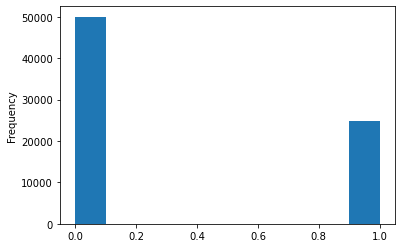

In [62]:
# Separate majority and minority classes
df_majority = df[df["TARGET"] == 0]
df_minority = df[df["TARGET"] == 1]


# Downsample majority class

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=50000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
    
# Display new class counts

df_downsampled['TARGET'].plot.hist()

In [63]:
df_train_downsampled = df_downsampled

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute impour data, then train
X_train_imp = imp.transform(X_train)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_imp, y_train)

X_test_imp = imp.transform(X_test)
y_pred_test = clf.predict(X_test_imp)

In [67]:
DW_RFC_Accuracy = accuracy_score(y_test, y_pred_test)
accuracy_score(y_test, y_pred_test)

0.7219522652565386

In [68]:
DW_RFC_CM = confusion_matrix(y_test, y_pred_test)
confusion_matrix(y_test, y_pred_test)

array([[9239,  698],
       [3193,  864]], dtype=int64)

In [69]:
subset_df

,SK_ID_CURR,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,TARGET
0,100002,-9461,0.139376,0.262949,0.083037,1
1,100003,-16765,NaN,0.622246,0.311267,0
2,100004,-19046,0.729567,0.555912,NaN,0
3,100006,-19005,NaN,0.650442,NaN,0
4,100007,-19932,NaN,0.322738,NaN,0
...,...,...,...,...,...,...
307506,456251,-9327,NaN,0.681632,0.145570,0
307507,456252,-20775,NaN,0.115992,NaN,0
307508,456253,-14966,0.218859,0.535722,0.744026,0
307509,456254,-11961,0.661024,0.514163,NaN,1


In [70]:
#df.to_csv(r'../data/processed/application_train.csv')